In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [105]:
HousePrices_Train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
HousePrices_Test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [106]:
# Summary and Descriptive analysis
print(HousePrices_Train.shape)
print(HousePrices_Train.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            

In [107]:
print(HousePrices_Train.describe(include = "all"))

                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utili

In [108]:
print("Number of missing values in each column")
HousePrices_Train.isnull().sum()

Number of missing values in each column


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [109]:
# Normalizing the data by applying StandardScaler on the numeric data
Train_numeric = HousePrices_Train.select_dtypes(include = np.number).drop('SalePrice', axis = 1)
scaler = StandardScaler()
HousePrices_Train[list(Train_numeric)] = scaler.fit_transform(HousePrices_Train[list(Train_numeric)])

In [110]:
Train_numeric = HousePrices_Train.select_dtypes(include = np.number)

* I ignored categorical variables. They seem to be contributing less. In general, we need to use one-hot encoding.
* Missing values need to be handled - On Numeric Data
    1. Removing out any observation that has missing values: Tried with this and found that many rows are getting removed. Hence, not using this.
    2. Removing columns containing null values: LotFrontage, GarageYrBlt columns null values. They seem to be of less important. Hence I tried removing them.
    3. Median imputation: I replaced the null values in a column with median to see if the model behaves any better. The results are very similar to removing columns with null values. So, I will be doing my further analysis with that dataset only.

In [111]:
# Removing missing value rows. Not recommended. Hence, not proceeding further.
Train_numeric_MissCase1 = Train_numeric.dropna()
Train_numeric_MissCase1.isnull().sum()

# Removing missing value columns, Works well.
Train_numeric_MissCase2 = Train_numeric.drop(["LotFrontage","GarageYrBlt"], axis = 1)

# Median imputation. Works same as above. So, proceeding with Train_numeric_MissCase2 for further analysis.
Train_numeric_median_imputation = Train_numeric.fillna(Train_numeric.median())


* Data Distribution - Histogram or box plot of Numeric data
* Transformations - Check if data is right skewed or left skewed and apply sqroot, log, box-cox. This is not done as of now, as we are doing simple linear regression. But, can be tried to improve the model.

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


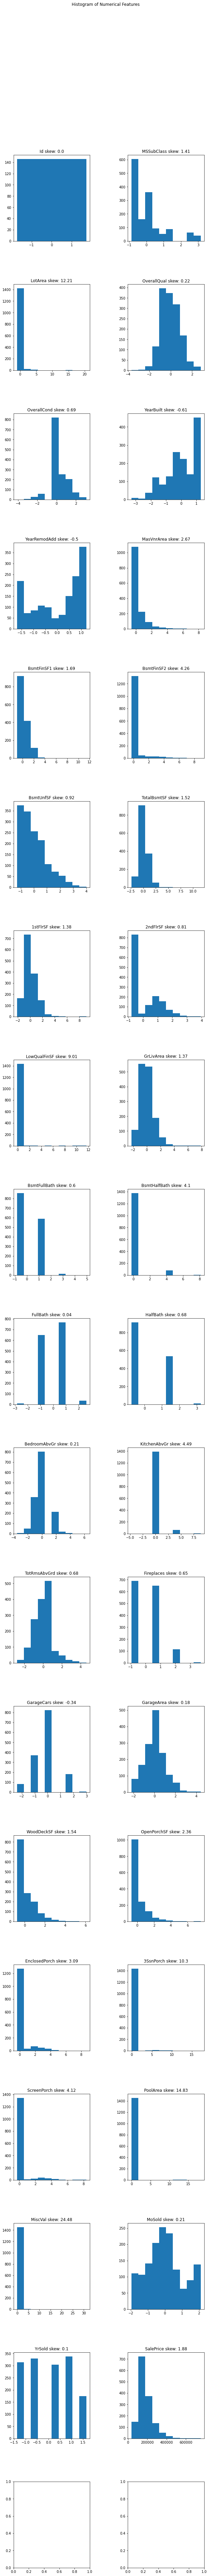

In [112]:
# Histogram of Numerical features
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (10, 100))
fig.suptitle(f"Histogram of Numerical Features\n",
             horizontalalignment = 'center', y = 1.05,
             verticalalignment = 'center', fontsize = 12)
fig.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.5, wspace = 0.5)
axes = axes.ravel()
for i, j in zip([i for i in Train_numeric_MissCase2.columns[0:]], range(len(Train_numeric_MissCase2.columns))):
    axes[j].hist(Train_numeric_MissCase2[i])
    axes[j].set_title(i + ' skew: ' + str(np.round(Train_numeric_MissCase2[i].skew(), 2)))

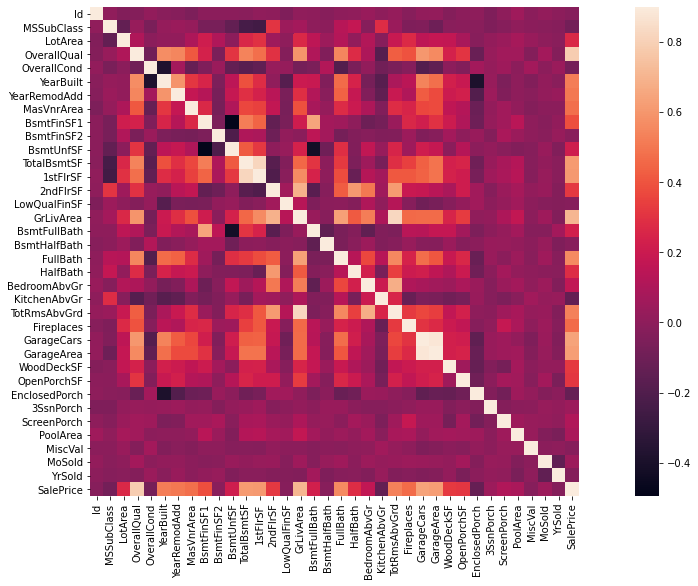

In [113]:
corrmat = Train_numeric_MissCase2.corr()
plt.subplots(figsize = (20, 9))
sns.heatmap(corrmat, vmax = 0.9, square = True)

In [114]:
# Extracting variables that are highly correlated with SalePrice
Train_numeric_MissCase2.corr()[["SalePrice"]].sort_values(by = "SalePrice")
Df = Train_numeric_MissCase2.corr()[["SalePrice"]]
Df = Df[(Df.SalePrice > 0.5) | (Df.SalePrice < -0.5)]
Df.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

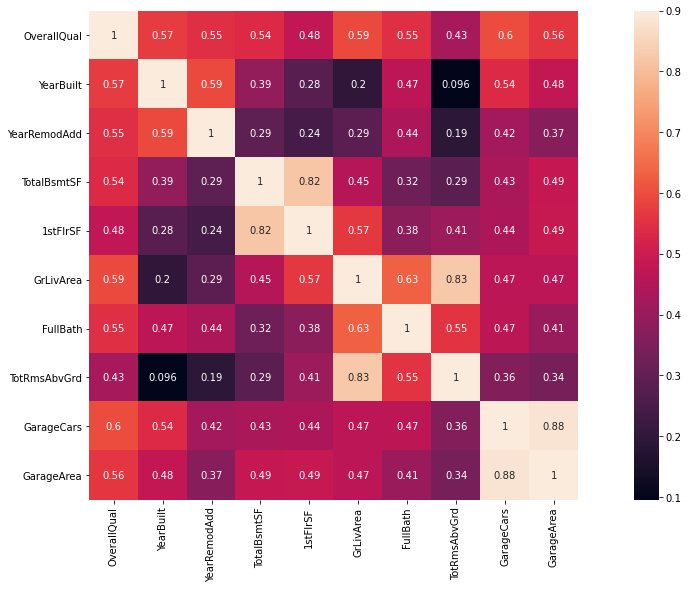

In [115]:
# Checking for multicollinearity within the variables highly correlated with SalePrice
corrmat = Train_numeric_MissCase2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']].corr()
plt.subplots(figsize = (20, 9))
sns.heatmap(corrmat, vmax = 0.9, square = True, annot = True)

In [116]:
print("Based on the above correlation matrix, TotalBsmtSF is removed as it is highly correlated with 1stFlrSF")
print("\nTotRmsAbvGrd is removed as it is highly correlated with GrLivArea")
print("\nGarageCars is removed as it is highly correlated with GarageArea")

Based on the above correlation matrix, TotalBsmtSF is removed as it is highly correlated with 1stFlrSF

TotRmsAbvGrd is removed as it is highly correlated with GrLivArea

GarageCars is removed as it is highly correlated with GarageArea


In [117]:
print("Splitting the data into train & test")
X = Train_numeric_MissCase2.drop("SalePrice", axis = 1)
y = Train_numeric_MissCase2[["SalePrice"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Splitting the data into train & test


In [118]:
reg = LinearRegression().fit(X_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageArea']], y_train)
print(reg.coef_)
print(reg.intercept_)

[[28944.45908892 10032.60186483  6458.05248005 10269.09867141
  25560.26638164 -3832.54626241  9792.68752251]]
[180238.85980049]


In [119]:
reg.score(X_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageArea']], y_test)

0.790586199892225

In [120]:
reg.score(X_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageArea']], y_train)

0.7608057855270116

One of the important features contain null values in the actual test data. Hence, we replacing them with a zero.

In [121]:
HousePrices_Test[['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageArea']].isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
GrLivArea       0
FullBath        0
GarageArea      1
dtype: int64

In [122]:
HousePrices_Test['GarageArea'] = HousePrices_Test['GarageArea'].fillna(0)

In [123]:
reg.predict(HousePrices_Test[['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageArea']])

array([[7.19110748e+07],
       [8.33113189e+07],
       [8.91430637e+07],
       ...,
       [8.23710319e+07],
       [6.79249962e+07],
       [1.00961319e+08]])

Choosing top 4 features (as the weights are high after evaluating the model on normalized columns) and repeating the above exercise to see how the model performs on the test data.

In [125]:
reg1 = LinearRegression().fit(X_train[['OverallQual', 'YearBuilt', '1stFlrSF','GrLivArea']], y_train)
print(reg1.coef_)
print(reg1.intercept_)

[[32328.4366449  14063.0975767  12301.18056866 25881.26096944]]
[180259.38631678]


In [179]:
output_prices = reg1.predict(HousePrices_Test[['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea']])

In [181]:
output_df = pd.DataFrame(index = np.arange(1461, 1461 + len(output_prices)), columns = ["SalePrice"])

In [182]:
output_df.index.name = "Id"
output_df["SalePrice"] = np.transpose(output_prices)[0]

In [184]:
output_df.to_csv("saint1729_submission.csv", sep = ',', encoding = 'utf-8')